### By : S Nandini
### Bharat Intern : Iris Flowers Classification
#### Predict the different species of flowers on the length of there petals and sepals only Jupyter notebook code.

#### Importing Libraries

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


#### Importing Dataset

In [57]:
iris_df = pd.read_csv(r"C:\Users\karth\Downloads\Iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


#### Exploratory Data Analysis 

In [59]:
iris_df.shape

(150, 6)

In [60]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [61]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [62]:
#dropping unwanted id coloumn from data
iris_df.drop('Id',axis=1,inplace = True)

In [63]:
iris_df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
38,4.4,3.0,1.3,0.2,Iris-setosa
44,5.1,3.8,1.9,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
52,6.9,3.1,4.9,1.5,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica


In [64]:
#checking for missing values
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [65]:
iris_df.duplicated().sum()

3

In [66]:
iris_df.drop_duplicates(keep='first',inplace=True)

In [67]:
iris_df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [68]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [69]:
iris_df.corr(numeric_only=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


In [70]:
#unique values
iris_df['SepalLengthCm'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [71]:
iris_df['SepalWidthCm'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [72]:
iris_df['PetalLengthCm'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [73]:
iris_df['PetalWidthCm'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [74]:
iris_df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

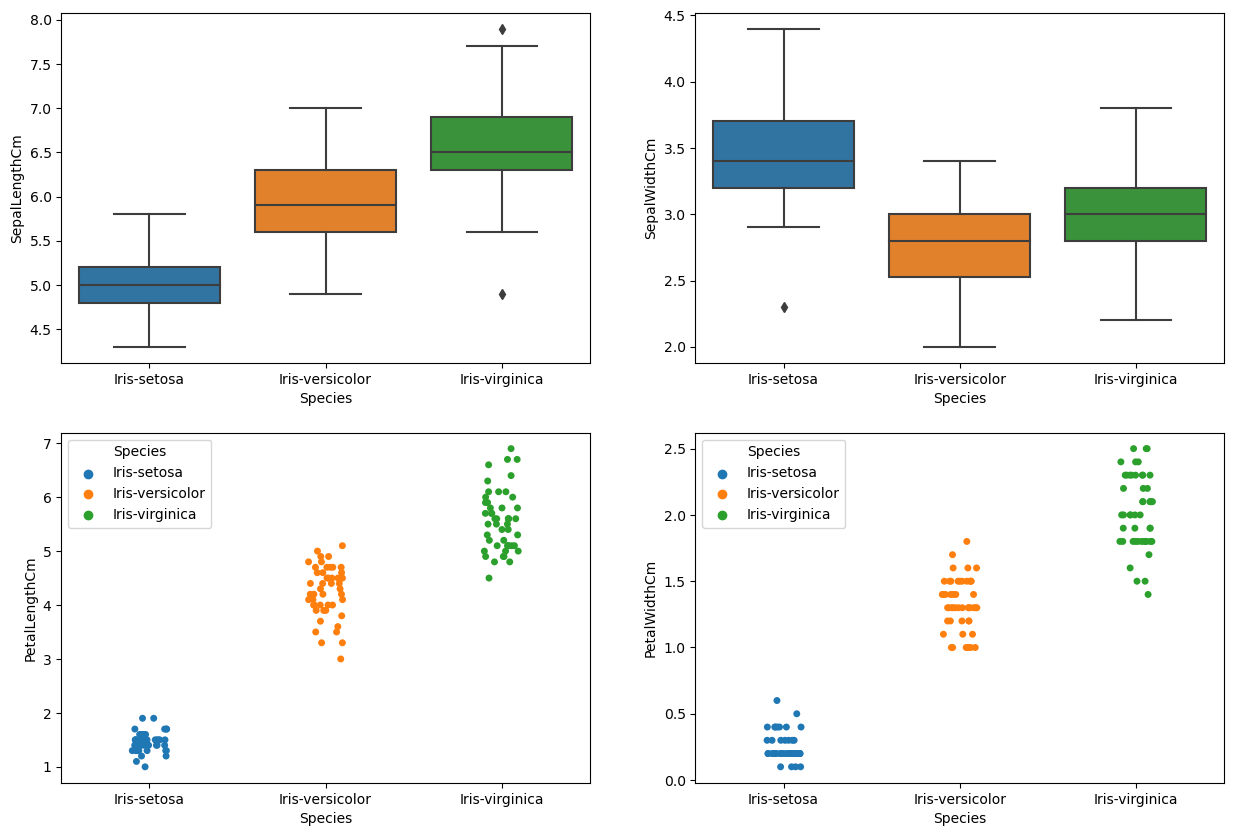

In [75]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(y="SepalLengthCm",x="Species",data=iris_df)

plt.subplot(2,2,2)
sns.boxplot(y="SepalWidthCm",x="Species",data=iris_df)

plt.subplot(2,2,3)
sns.stripplot(x="Species", y="PetalLengthCm", data=iris_df,hue='Species')

plt.subplot(2,2,4)
sns.stripplot(x="Species", y="PetalWidthCm", data=iris_df,hue='Species')

plt.show()

In [76]:
iris1=iris_df[iris_df['Species']=='Iris-setosa']
iris2=iris_df[iris_df['Species']=='Iris-versicolor']
iris3=iris_df[iris_df['Species']=='Iris-virginica']

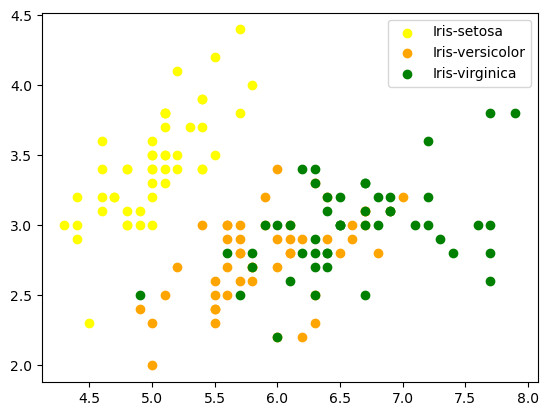

In [77]:
plt.scatter(iris1['SepalLengthCm'],iris1['SepalWidthCm'],color = 'yellow',label='Iris-setosa')
plt.scatter(iris2['SepalLengthCm'],iris2['SepalWidthCm'],color = 'orange',label='Iris-versicolor')
plt.scatter(iris3['SepalLengthCm'],iris3['SepalWidthCm'],color = 'green',label='Iris-virginica')

plt.legend()


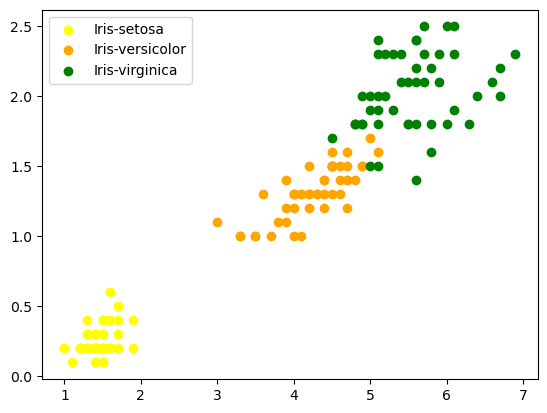

In [78]:
plt.scatter(iris1['PetalLengthCm'],iris1['PetalWidthCm'],color = 'yellow',label='Iris-setosa')
plt.scatter(iris2['PetalLengthCm'],iris2['PetalWidthCm'],color = 'orange',label='Iris-versicolor')
plt.scatter(iris3['PetalLengthCm'],iris3['PetalWidthCm'],color = 'green',label='Iris-virginica')

plt.legend()

<Axes: >

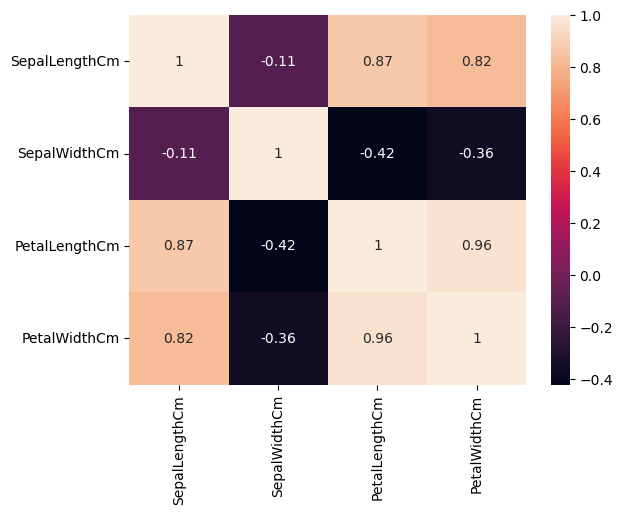

In [79]:
sns.heatmap(iris_df.corr(numeric_only=True),annot=True)

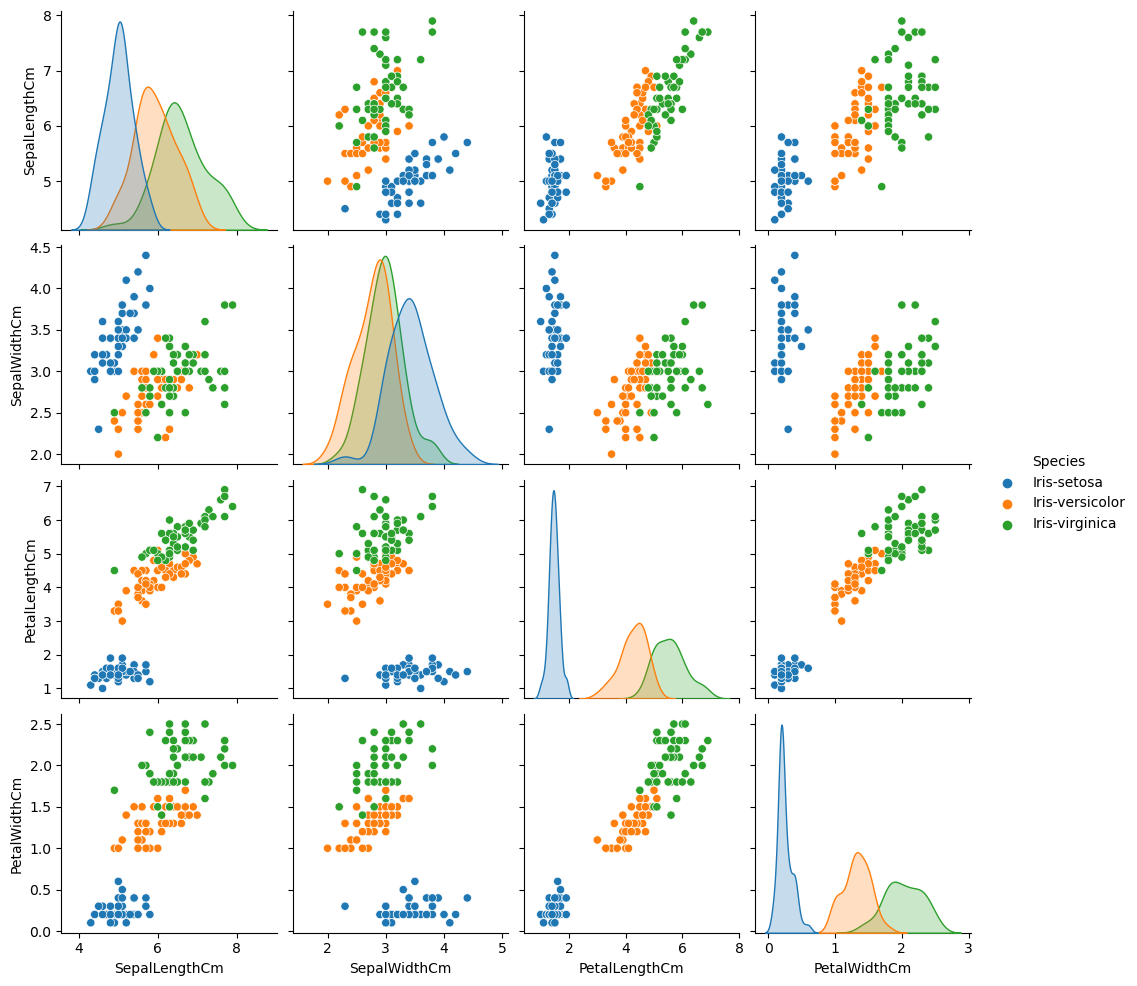

In [80]:
sns.pairplot(data=iris_df,hue='Species')

Iris-Setosa can be separated easily 

#### Model Training

In [81]:
le = LabelEncoder()

In [82]:
iris_df['Species'] = le.fit_transform(iris_df['Species'])

In [83]:
iris_df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
74,6.4,2.9,4.3,1.3,1
24,4.8,3.4,1.9,0.2,0
126,6.2,2.8,4.8,1.8,2
2,4.7,3.2,1.3,0.2,0
67,5.8,2.7,4.1,1.0,1


In [84]:
X = iris_df.iloc[:,0:4]
y = iris_df.iloc[:,4]

In [85]:
print(X.sample(5))
print(X.shape)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
22             4.6           3.6            1.0           0.2
104            6.5           3.0            5.8           2.2
103            6.3           2.9            5.6           1.8
94             5.6           2.7            4.2           1.3
93             5.0           2.3            3.3           1.0
(147, 4)


In [86]:
print(y.sample(5))
print(y.shape)

12     0
126    2
26     0
103    2
115    2
Name: Species, dtype: int32
(147,)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [88]:
svc = SVC()

In [89]:
svc.fit(X_train, y_train)

SVC()

In [90]:
y_pred = svc.predict(X_test)

In [91]:
print(f'Accuracy of SVM Model : {accuracy_score(y_pred,y_test)*100}' )

Accuracy of SVM Model : 100.0


### Tree Model

In [92]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [93]:
y_pred_2 = dtc.predict(X_test)

In [94]:
print(f'Accuracy of the Decision Tree Model : {accuracy_score(y_pred_2, y_test)*100}')

Accuracy of the Decision Tree Model : 96.66666666666667


### Thank you